# Text Tokenization Sushil

## Import & Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from collections import Counter
from imblearn.over_sampling import SMOTE
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split

c:\Users\walkervalentinus\Documents\PERKULIAHAN\Final_Year\SEMHAS\tasi2425112\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


## Load Data

In [2]:
clean_df = pd.read_csv("dataset/Sushil/clean.csv")

## Check Label Distribution (Imbalance Analysis)

In [3]:
# Label count
label_counts = clean_df["labels"].value_counts().sort_index()
labels = label_counts.index
counts = label_counts.values

In [4]:
# Get majority and minority label
major_label = label_counts.idxmax()
minor_label = label_counts.idxmin()

In [5]:
# Count percentage 
total = counts.sum()
diff_percent = ((counts.max() - counts.min()) / total) * 100

In [6]:
plot_df = pd.DataFrame({
    "Label": labels,
    "Count": counts,
    "Category": ["Major" if l == major_label else "Minor" for l in labels]
})

In [7]:
color_map = {"Major": "blue", "Minor": "red"}

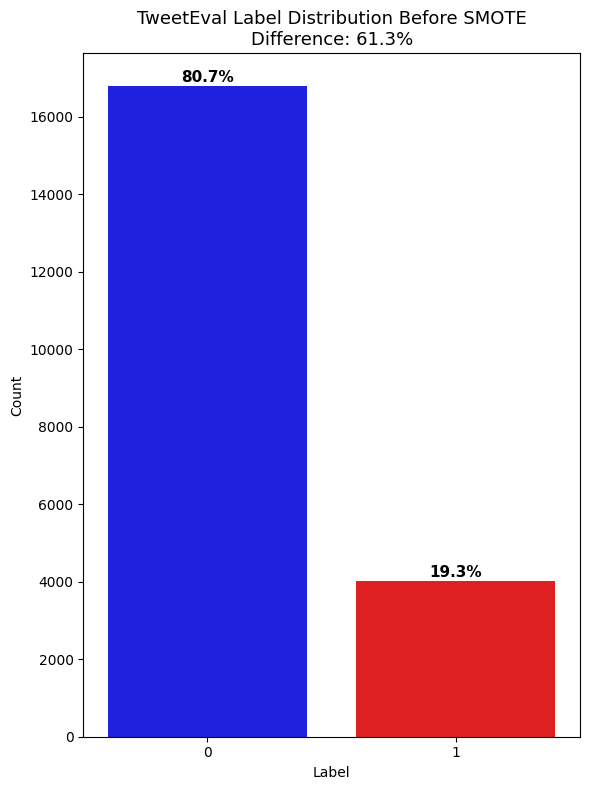

In [8]:
# Plot
plt.figure(figsize=(6, 8))
ax = sns.barplot(data=plot_df, x="Label", y="Count", hue="Category", palette=color_map, dodge=False)
ax.legend_.remove() 

# Add percentage above the bar
for i, count in enumerate(counts):
    pct = (count / total) * 100
    plt.text(i, count + 5, f"{pct:.1f}%", ha='center', va='bottom', fontsize=11, fontweight='bold')

# Title and label
plt.title(f"TweetEval Label Distribution Before SMOTE\nDifference: {diff_percent:.1f}%", fontsize=13)
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Tokenization

In [9]:
# Load tokenizer
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-lite-base-p1")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'AlbertTokenizerFast'. 
The class this function is called from is 'BertTokenizer'.


In [10]:
def tokenize_column(texts):
    return [tokenizer.encode(text, max_length=128, padding='max_length', truncation=True) for text in texts]

In [11]:
clean_df["token_no_emoji"] = tokenize_column(clean_df["No Stopword Text"].astype(str))
clean_df["token_with_emoji"] = tokenize_column(clean_df["Text with Emoji no Stopword"].astype(str))

In [12]:
clean_df.head(10)

,No Stopword Text,Text with Emoji no Stopword,labels,token_no_emoji,token_with_emoji
0,saat dekat ayah dekat sekarang selalu,saat dekat ayah dekat sekarang selalu tangan l...,0,"[2, 305, 920, 2161, 920, 747, 811, 3, 0, 0, 0,...","[2, 305, 920, 2161, 920, 747, 811, 1122, 7290,..."
1,susah ingat judul lagu hari tapi hampir semua ...,susah ingat judul lagu hari tapi hampir semua ...,0,"[2, 3684, 3100, 3011, 1885, 406, 469, 1856, 36...","[2, 3684, 3100, 3011, 1885, 406, 469, 1856, 36..."
2,lalu kamu minta foto kontak biar lihat dan nya...,lalu kamu minta foto kontak biar lihat dan nya...,1,"[2, 629, 508, 2757, 1072, 3865, 3308, 1173, 41...","[2, 629, 508, 2757, 1072, 3865, 3308, 1173, 41..."
3,jurassic babi perut babi cabai lengket glasir ...,jurassic babi perut babi cabai lengket glasir ...,0,"[2, 11195, 14508, 29851, 7996, 3318, 7996, 100...","[2, 11195, 14508, 29851, 7996, 3318, 7996, 100..."
4,aman datang malam perempuan nyuruh buat tenang...,aman datang malam perempuan nyuruh buat tenang...,0,"[2, 1703, 1095, 1217, 1747, 794, 782, 968, 413...","[2, 1703, 1095, 1217, 1747, 794, 782, 968, 413..."
5,gak ngerti cewek marah cuma gara gara cowok,gak ngerti cewek marah cuma gara gara cowok wa...,1,"[2, 1489, 12056, 2956, 4700, 2279, 14368, 1436...","[2, 1489, 12056, 2956, 4700, 2279, 14368, 1436..."
6,gak ngerti finsta kalian posting foto gak nyam...,gak ngerti finsta kalian posting foto gak nyam...,1,"[2, 1489, 12056, 4182, 764, 29832, 1504, 5554,...","[2, 1489, 12056, 4182, 764, 29832, 1504, 5554,..."
7,baru nonton fishermentokings dokumenter fotogr...,baru nonton fishermentokings dokumenter fotogr...,0,"[2, 440, 5888, 12327, 6418, 23657, 11218, 2984...","[2, 440, 5888, 12327, 6418, 23657, 11218, 2984..."
8,twitter butuh banget tombol sunting tweet,twitter butuh banget tombol sunting tweet waja...,1,"[2, 4684, 2655, 2174, 4221, 21576, 10212, 3, 0...","[2, 4684, 2655, 2174, 4221, 21576, 10212, 1769..."
9,sangat benci orang,sangat benci orang wajah air mata gembira waja...,1,"[2, 310, 11940, 232, 3, 0, 0, 0, 0, 0, 0, 0, 0...","[2, 310, 11940, 232, 1769, 514, 1163, 8501, 17..."


## SMOTE Oversampling

In [14]:
X = np.array(clean_df["token_no_emoji"].tolist())
y = clean_df["labels"].values

In [15]:
sm = SMOTE(random_state=42, sampling_strategy='auto')
X_resampled, y_resampled = sm.fit_resample(X, y)

## Check Oversampling Result 

In [18]:
print("\nSushil Label counts after SMOTE:")
print(Counter(y_resampled))


Sushil Label counts after SMOTE:
Counter({np.int64(0): 16798, np.int64(1): 16798})


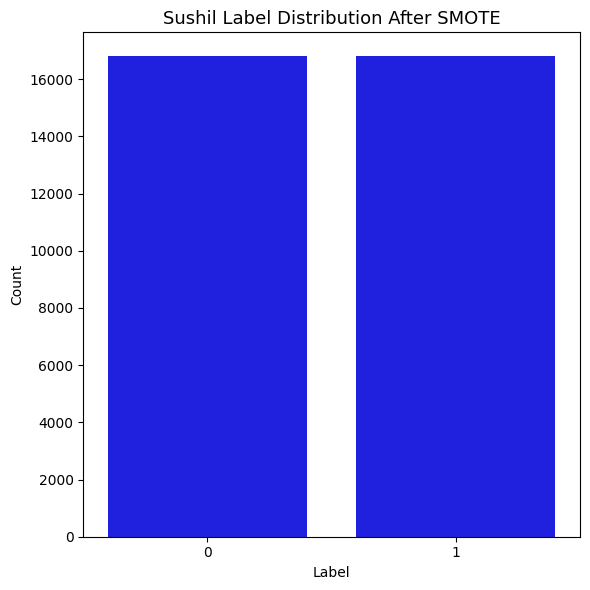

In [19]:
plt.figure(figsize=(6, 6))
sns.barplot(x=list(Counter(y_resampled).keys()), y=list(Counter(y_resampled).values()), color='blue')
plt.title("Sushil Label Distribution After SMOTE", fontsize=13)
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Save Result

In [20]:
clean_df.to_csv("dataset/Sushil/tokenized_original.csv", index=False)

In [21]:
# Save SMOTE results for token_no_emoji
resampled_df_no_emoji = pd.DataFrame(X_resampled.tolist())
resampled_df_no_emoji['label'] = y_resampled
resampled_df_no_emoji.to_csv("dataset/Sushil/tokenized_smote_no_emoji.csv", index=False)

In [22]:
# Save SMOTE results for token_with_emoji (optional repeat)
X2 = np.array(clean_df["token_with_emoji"].tolist())
X2_resampled, y2_resampled = sm.fit_resample(X2, y)
resampled_df_with_emoji = pd.DataFrame(X2_resampled.tolist())
resampled_df_with_emoji['label'] = y2_resampled
resampled_df_with_emoji.to_csv("dataset/Sushil/tokenized_smote_with_emoji.csv", index=False)

## Train Test Split 

In [23]:
def split_and_save(dataframe, output_dir, name_prefix):
    # Split 80% train, 20% temp
    train_df, temp_df = train_test_split(dataframe, test_size=0.2, stratify=dataframe['label'], random_state=42)

    # Split 10% val, 10% test from temp (50:50 split of 20%)
    val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Save files
    train_df.to_csv(f"{output_dir}/{name_prefix}_train.csv", index=False)
    val_df.to_csv(f"{output_dir}/{name_prefix}_val.csv", index=False)
    test_df.to_csv(f"{output_dir}/{name_prefix}_test.csv", index=False)

In [24]:
df_no_emoji = pd.read_csv("dataset/Sushil/tokenized_smote_no_emoji.csv")
df_with_emoji = pd.read_csv("dataset/Sushil/tokenized_smote_with_emoji.csv")

split_and_save(df_no_emoji, "dataset/Sushil/TTVWE", "no_emoji")
split_and_save(df_with_emoji, "dataset/Sushil/TTVED", "with_emoji")